# Email Spam Classification #
**NATURAL LANGUAGE PROCESSING**

**ISMAIL ABU SAIID**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading the Email data
data = pd.read_csv('data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Creating the class label (ham = 0, spam = 1)
data['Label'] = data['Category'].map({'ham': 0, 'spam': 1})
data.head()

,Category,Message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Creating Visualization of the ham/spam counts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

data['Label'].value_counts()

0    4825
1     747
Name: Label, dtype: int64

<ipython-input-7-01a55c93b93f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette={'ham': 'mediumblue', 'spam': 'orangered'})


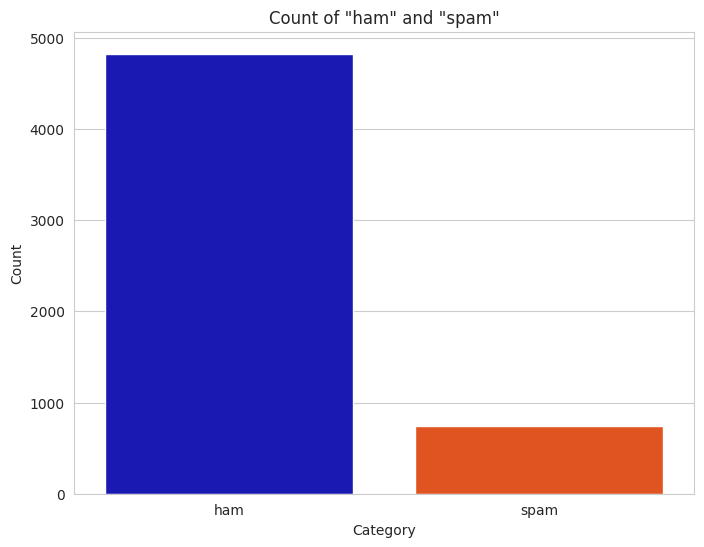

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x='Category', data=data, palette={'ham': 'mediumblue', 'spam': 'orangered'})
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of "ham" and "spam"')
plt.show()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Getting the count of tokens for each message
def count_words(text):
    words = word_tokenize(text)
    return len(words)
data['Count'] = data['Message'].apply(count_words)
data['Count']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Count, Length: 5572, dtype: int64

In [ ]:
mean_counts = data.groupby('Label')['Count'].mean()
mean_counts

Label
0    17.425699
1    27.878179
Name: Count, dtype: float64

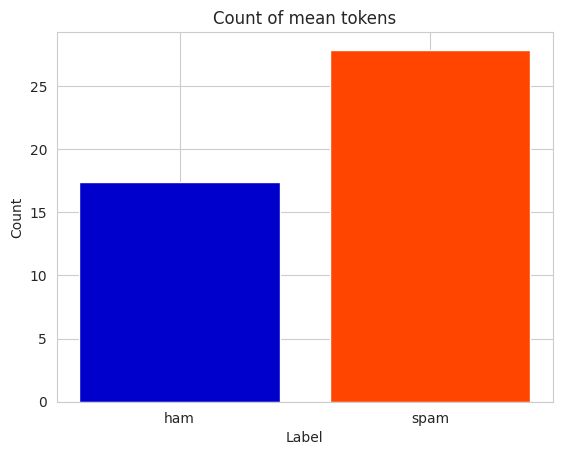

In [ ]:
# Plotting
plt.bar(mean_counts.index, mean_counts.values, color=['mediumblue', 'orangered'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of mean tokens')
plt.xticks(mean_counts.index, ['ham', 'spam'])
plt.show()

In [ ]:
data.head()

,Category,Message,Label,Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,24
1,ham,Ok lar... Joking wif u oni...,0,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,ham,U dun say so early hor... U c already then say...,0,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,15


## Tokenization ##

In [ ]:
data.head()

,Category,Message,Label,Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,24
1,ham,Ok lar... Joking wif u oni...,0,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,ham,U dun say so early hor... U c already then say...,0,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,15


In [ ]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

data['Message'] = data['Message'].apply(lambda string: clean_str(string))
data.head()

,Category,Message,Label,Count
0,ham,go until jurong point crazy available only in ...,0,24
1,ham,ok lar joking wif u oni,0,8
2,spam,free entry in a wkly comp to win fa cup final ...,1,37
3,ham,u dun say so early hor u c already then say,0,13
4,ham,nah i don t think he goes to usf he lives arou...,0,15


## Stemming words ##

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
data['Message'] = data['Message'].apply(stemming)
data.head()

,Category,Message,Label,Count
0,ham,go until jurong point crazy available only in ...,0,24
1,ham,ok lar joking wif u oni,0,8
2,spam,free entry in a wkly comp to win fa cup final ...,1,37
3,ham,u dun say so early hor u c already then say,0,13
4,ham,nah i don t think he goes to usf he lives arou...,0,15


In [ ]:
X = data.loc[:, 'Message']
y = data.loc[:, 'Label']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5572,)
shape of y: (5572,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [ ]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Training Data Shape: (4457,)
Test Data Shape: (1115,)


##Count Vectorization to Extract Features##

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [ ]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  6916


In [ ]:
dtv = cv.transform(X_train)
type(dtv)

scipy.sparse._csr.csr_matrix

In [ ]:
dtv = dtv.toarray()

# Using Algorithms (SVM, KNN, Decision Tree, Random Forest, Logistic Regression)#

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
models = {
    "Random Forest": {"model":RandomForestClassifier()},
    "Logistic Regression": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)},
    "KNN": {"model":KNeighborsClassifier()},
    "Decision Tree": {"model":DecisionTreeClassifier()},
    "SVM": {"model":SVC()}
}

for name, model in models.items():
    model['model'].fit(dtv, y_train)

In [ ]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

Number of Observations: 1115
Tokens: 6916


In [ ]:
# Creating the classification report for each model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**SVM**

In [ ]:
svc = SVC()
svc.fit(dtv, y_train)
pred = svc.predict(test_dtv)

class_report = classification_report(y_test, pred)
print('Accuracy: ', accuracy_score(y_test, pred) * 100)
print(class_report)
SVM_f1_score = float(class_report.split()[-2])

Accuracy:  97.847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       975
           1       0.98      0.85      0.91       140

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred = knn.predict(test_dtv)

print('Accuracy: ', accuracy_score(y_test, pred) * 100)
class_report = classification_report(y_test, pred)
print(class_report)
KNN_f1_score = float(class_report.split()[-2])

Accuracy:  93.54260089686099
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.49      0.65       140

    accuracy                           0.94      1115
   macro avg       0.97      0.74      0.81      1115
weighted avg       0.94      0.94      0.93      1115



**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred = dtc.predict(test_dtv)

print('Accuracy: ', accuracy_score(y_test, pred) * 100)
class_report = classification_report(y_test, pred)
print(class_report)
DTC_f1_score = float(class_report.split()[-2])

Accuracy:  96.7713004484305
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       975
           1       0.91      0.83      0.87       140

    accuracy                           0.97      1115
   macro avg       0.94      0.91      0.92      1115
weighted avg       0.97      0.97      0.97      1115



**Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred = rfc.predict(test_dtv)

print('Accuracy: ', accuracy_score(y_test, pred) * 100)
class_report = classification_report(y_test, pred)
print(class_report)
RFC_f1_score = float(class_report.split()[-2])

Accuracy:  97.30941704035875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       975
           1       0.98      0.80      0.88       140

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



**Logistic Regression**

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred = lr.predict(test_dtv)

print('Accuracy: ', accuracy_score(y_test, pred) * 100)
class_report = classification_report(y_test, pred)
print(class_report)
LR_f1_score = float(class_report.split()[-2])

Accuracy:  97.9372197309417
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       975
           1       0.96      0.87      0.91       140

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Getting Accuracies and F1-Scores
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test)])

data_accuracy = pd.DataFrame(models_accuracy)
data_accuracy.columns = ['Model', 'Test Accuracy']
data_accuracy.reset_index(drop = True, inplace=True)
data_accuracy = data_accuracy.sort_values(by='Test Accuracy', ascending=False)
data_accuracy

,Model,Test Accuracy
1,Logistic Regression,0.979372
4,SVM,0.978475
0,Random Forest,0.971300
3,Decision Tree,0.969507
2,KNN,0.935426


In [ ]:
f1scores = [['SVM', SVM_f1_score], ['KNN', KNN_f1_score], ['Decision Tree', DTC_f1_score],
            ['Random Forest', RFC_f1_score], ['Logistic Regression', LR_f1_score]]

F1_scores = pd.DataFrame(f1scores, columns=['Model', 'F1-Score']).sort_values(by='F1-Score', ascending=False)
F1_scores

,Model,F1-Score
0,SVM,0.98
4,Logistic Regression,0.98
2,Decision Tree,0.97
3,Random Forest,0.97
1,KNN,0.93


**Analysis & Visualization of Results**

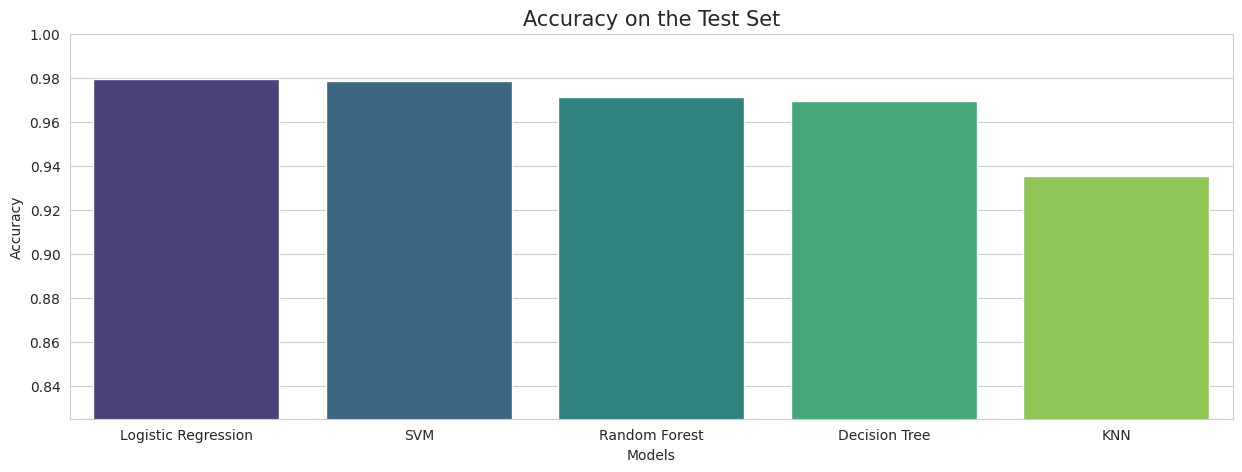

In [ ]:
# Visualization of Accuracy for all the models
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = data_accuracy, palette='viridis')
plt.title('Accuracy on the Test Set', fontsize = 15)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.825,1)
plt.savefig('Accuracy on the Test Set')
plt.show()

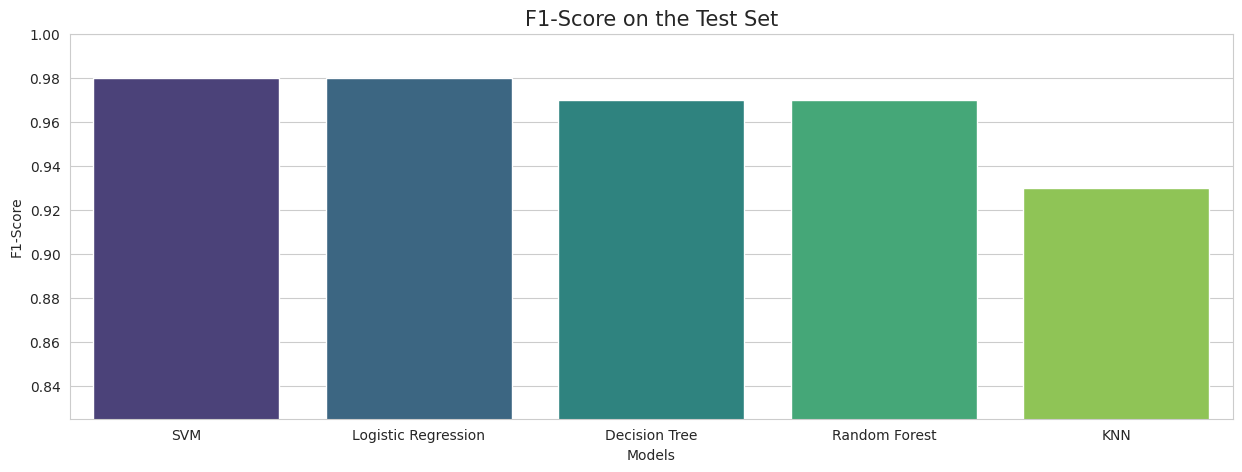

In [ ]:
# Visualization of F1-Score for all the models
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='F1-Score', data = F1_scores, palette='viridis')
plt.title('F1-Score on the Test Set', fontsize = 15)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.ylim(0.825,1)
plt.savefig('F1-Score on the Test Set')
plt.show()

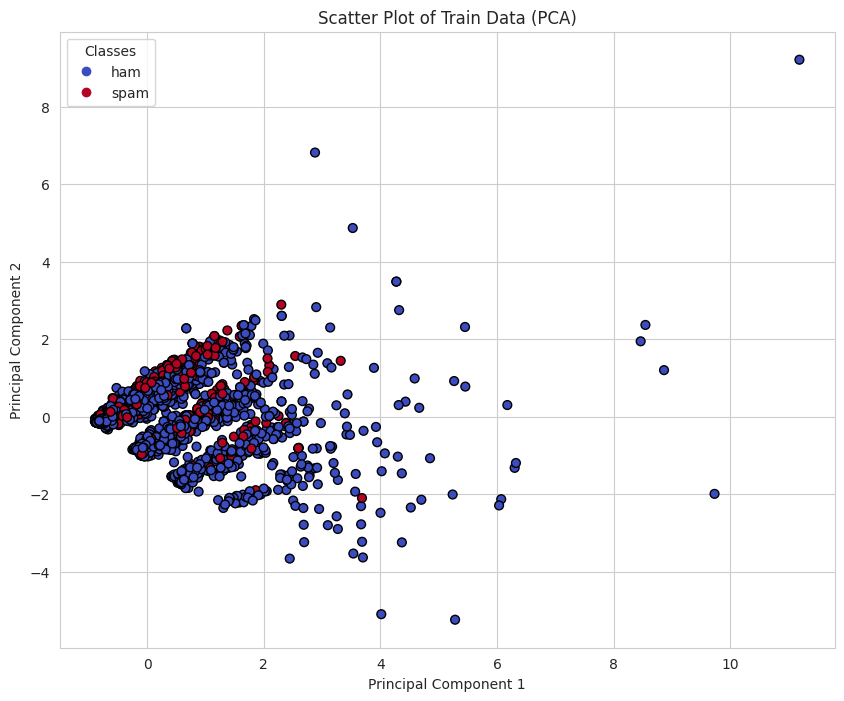

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Apply CountVectorizer
cv = CountVectorizer()
X_dtv = cv.fit_transform(X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dtv.toarray())

# Plot scatter plot for text data with custom legend labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
plt.title('Scatter Plot of Train Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create legend handles and labels
handles, labels = scatter.legend_elements()
legend_labels = ['ham', 'spam']

# Customize legend with custom labels
plt.legend(handles, legend_labels, title="Classes")
plt.savefig('Scatter Plot of Train Data')
plt.show()

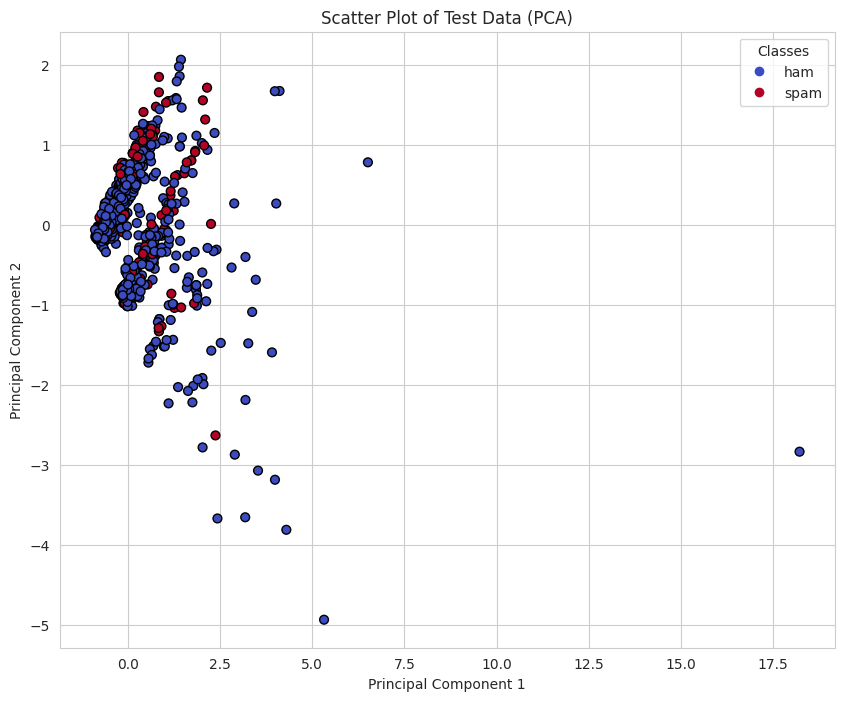

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

# Apply CountVectorizer to the test data
X_test_dtv = cv.transform(X_test)

# Apply PCA for dimensionality reduction on the test data
X_test_pca = pca.transform(X_test_dtv.toarray())

# Plot scatter plot for text data with custom legend labels for the test set
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
plt.title('Scatter Plot of Test Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create legend handles and labels
handles, labels = scatter.legend_elements()
legend_labels = ['ham', 'spam']

# Customize legend with custom labels
plt.legend(handles, legend_labels, title="Classes")
plt.savefig('Scatter Plot of Test Data')
plt.show()

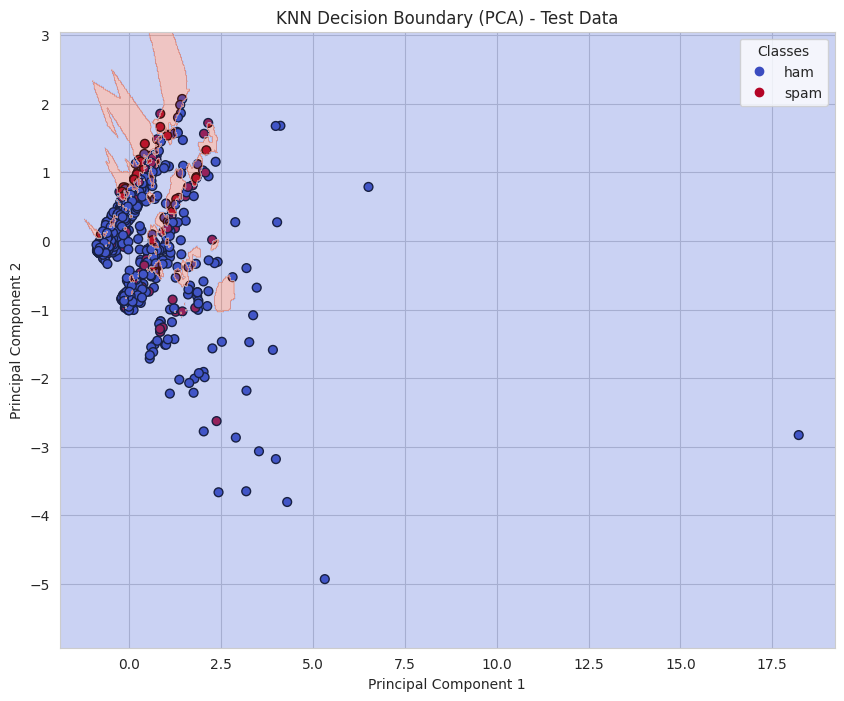

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Apply CountVectorizer
cv = CountVectorizer()
X_dtv = cv.fit_transform(X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dtv.toarray())

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_pca, y_train)

# Apply CountVectorizer to the test data
X_test_dtv = cv.transform(X_test)

# Apply PCA to the test data
X_test_pca = pca.transform(X_test_dtv.toarray())

# Plot scatter plot for text data with KNN decision boundary
plt.figure(figsize=(10, 8))

# KNN
scatter_knn = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
plt.title('KNN Decision Boundary (PCA) - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter_knn.legend_elements(), title="Classes")

# Plot KNN decision boundary
h = .02  # step size in the mesh
x_min_knn, x_max_knn = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min_knn, y_max_knn = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx_knn, yy_knn = np.meshgrid(np.arange(x_min_knn, x_max_knn, h), np.arange(y_min_knn, y_max_knn, h))
Z_knn = knn_model.predict(np.c_[xx_knn.ravel(), yy_knn.ravel()])

# Put the result into a color plot
Z_knn = Z_knn.reshape(xx_knn.shape)
plt.contourf(xx_knn, yy_knn, Z_knn, cmap=plt.cm.coolwarm, alpha=0.3)

# Create legend handles and labels
handles, labels = scatter.legend_elements()
legend_labels = ['ham', 'spam']

# Customize legend with custom labels
plt.legend(handles, legend_labels, title="Classes")
plt.savefig('KNN Decision Boundary')
plt.show()

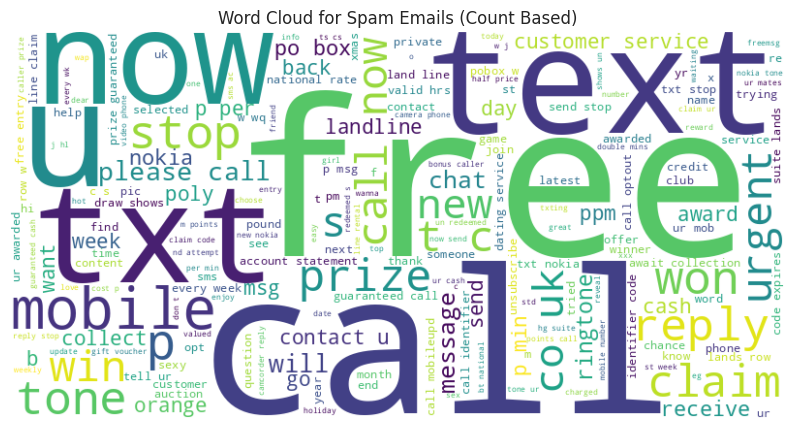

In [ ]:
# Creating a Word Clouds of words which were associated to be spam
from wordcloud import WordCloud
# Filter out spam messages
spam_messages = data[data['Label'] == 1]['Message']

# Combine all spam messages into a single string
spam_text = ' '.join(spam_messages)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails (Count Based)')
plt.savefig('Word Cloud for Spam Emails (Count Based)')
plt.show()

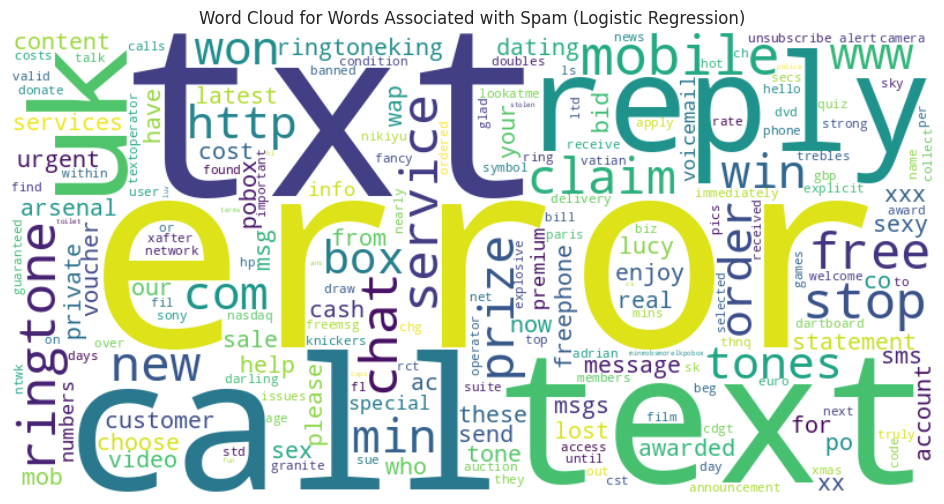

In [ ]:
# Apply CountVectorizer to the training data
cv = CountVectorizer()
X_train_dtv = cv.fit_transform(X_train)

# Train Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
lr_model.fit(X_train_dtv, y_train)

# Get feature names from CountVectorizer
feature_names = cv.get_feature_names_out()

# Create a dictionary mapping feature names to their coefficients
coef_dict = dict(zip(feature_names, lr_model.coef_[0]))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(coef_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Words Associated with Spam (Logistic Regression)')
plt.savefig('Word Cloud for Words Associated with Spam (Logistic Regression)')
plt.show()

In [ ]:
# Apply CountVectorizer to the training data
cv = CountVectorizer()
X_train_dtv = cv.fit_transform(X_train)

# Train Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
lr_model.fit(X_train_dtv, y_train)

# Get feature names from CountVectorizer
feature_names = cv.get_feature_names_out()

# Create a DataFrame to associate feature names with their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_[0]})

# Sort DataFrame by absolute coefficient values to identify important features
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top N features
top_n_features = 20
print(f"Top {top_n_features} words associated with spam (Logistic Regression):")
print(coef_df.head(top_n_features))

Top 20 words associated with spam (Logistic Regression):
       Feature  Coefficient
1846     error     2.506306
6271       txt     2.279041
846       call     1.862354
5980      text     1.848579
4899     reply     1.728867
6296        uk     1.671698
3727    mobile     1.573546
4976  ringtone     1.393888
5694      stop     1.364933
982       chat     1.357053
5218   service     1.355284
2197      free     1.282342
1064     claim     1.243259
3943       new     1.235555
4592     prize     1.174797
6686       win     1.119385
6737       won     1.108958
1141       com     1.089115
3670       min     1.065101
6148     tones     1.026453


**Test Example**

In [ ]:
# Example strings
ham_example = "Hi there, just checking in to see how you're doing. Let's catch up soon for coffee."
spam_example = "Get rich quick! Amazing offer, win a million dollars in just one click. Claim your prize now!"

# Apply the same preprocessing to the examples
spam_example_cleaned = clean_str(stemming(spam_example))
ham_example_cleaned = clean_str(stemming(ham_example))

# Transform the examples using CountVectorizer
spam_example_dtv = cv.transform([spam_example_cleaned])
ham_example_dtv = cv.transform([ham_example_cleaned])

# Predict labels using the logistic regression model
spam_prediction = lr_model.predict(spam_example_dtv)[0]
ham_prediction = lr_model.predict(ham_example_dtv)[0]

# Display predictions
print(f"Ham Example Prediction: {ham_prediction} (0 for ham)")
print(f"Spam Example Prediction: {spam_prediction} (1 for spam)")

Ham Example Prediction: 0 (0 for ham)
Spam Example Prediction: 1 (1 for spam)
